**SCRAPING DATA FROM SKYTRAX**

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []
rating_score = []
date = []
country = []
review_details = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    soup = BeautifulSoup(response.content, "html.parser")

    #reviews
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    #rating score
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            rating_score.append(item.span.text)
        except:
            print(f"Error on page {i}")
            rating_score.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

    #rating stats

    for review in soup.find_all('div', class_='body'):
        review_data = {}
        ratings = review.find('table', class_='review-ratings')

        #categories list
        cat_list = ['type_of_traveller','cabin_flown', 'route', 'recommended']
        for item in cat_list:
            cell = ratings.find('td', class_=f'review-rating-header {item}')
            review_data[item] = cell.next_sibling.text if cell else ''

        #star rating categories
        star_list = [
            'seat_comfort', 'cabin_staff_service', 'food_and_beverages',
            'ground_service', 'value_for_money', 'inflight_entertainment',
            'wifi_and_connectivity'
        ]
        for item in star_list:
            try:
                stars = ratings.find('td', class_=f'review-rating-header {item}').parent
                review_data[item] = len(stars.find_all('span', class_='star fill'))
            except:
                review_data[item] = 0  #default to 0 if no stars are found

        review_details.append(review_data)


    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
print(len(reviews), len(rating_score), len(date), len(country), len(review_details))

3877 3927 3877 3877 3877


In [ ]:
#make sure that all lists are of the same length
min_len = min(len(reviews), len(rating_score), len(date), len(country), len(review_details))
reviews = reviews[:min_len]
rating_score = rating_score[:min_len]
date = date[:min_len]
country = country[:min_len]
review_details = review_details[:min_len]

In [ ]:
#create df
df = pd.DataFrame({"reviews":reviews,
                   "rating_score": rating_score,
                   "date":date,
                   "country": country
                   })

In [ ]:
#convert `review_details` into df
df_details = pd.DataFrame(review_details)

In [ ]:
#concatenate the two dfs
df = pd.concat([df, df_details], axis=1)

In [ ]:
df.head()

,reviews,rating_score,date,country,type_of_traveller,cabin_flown,route,recommended,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity
0,✅ Trip Verified | On arriving at Mexico Airp...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,25th October 2024,United Kingdom,Business,Business Class,Mexico City to London Heathrow,no,1,1,0,1,1,0,0
1,✅ Trip Verified | I have flown British Airwa...,1,24th October 2024,United States,Solo Leisure,Business Class,Paris to Boston via London,no,1,1,0,1,2,0,0
2,Not Verified | We bought tickets for a Geneva-...,1,22nd October 2024,Switzerland,Family Leisure,Economy Class,Geneva to London,no,0,0,0,1,1,0,0
3,✅ Trip Verified | Appalling service with fai...,1,14th October 2024,South Africa,Business,Business Class,Johannesburg to London,no,2,1,2,1,1,2,2
4,✅ Trip Verified | British Airways charge you f...,1,12th October 2024,United Kingdom,Business,Business Class,London to Mexico City,yes,1,5,1,2,3,1,2


In [ ]:
from google.colab import drive
import os

#mount google drive
drive.mount('/content/gdrive/', force_remount=True)

#path
path = '/content/gdrive/My Drive/datasets/BA_reviews.csv'

#save df as a csv file to Google Drive
df.to_csv(path, index=False)

print(f"File saved to {path}")

Mounted at /content/gdrive/
File saved to /content/gdrive/My Drive/datasets/BA_reviews.csv


**DATA CLEANING**

In [ ]:
#load dataset
df = pd.read_csv('/content/gdrive/My Drive/datasets/BA_reviews.csv')
df.head()

,reviews,rating_score,date,country,type_of_traveller,cabin_flown,route,recommended,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity
0,✅ Trip Verified | On arriving at Mexico Airp...,5.0,25th October 2024,United Kingdom,Business,Business Class,Mexico City to London Heathrow,no,1,1,0,1,1,0,0
1,✅ Trip Verified | I have flown British Airwa...,1.0,24th October 2024,United States,Solo Leisure,Business Class,Paris to Boston via London,no,1,1,0,1,2,0,0
2,Not Verified | We bought tickets for a Geneva-...,1.0,22nd October 2024,Switzerland,Family Leisure,Economy Class,Geneva to London,no,0,0,0,1,1,0,0
3,✅ Trip Verified | Appalling service with fai...,1.0,14th October 2024,South Africa,Business,Business Class,Johannesburg to London,no,2,1,2,1,1,2,2
4,✅ Trip Verified | British Airways charge you f...,1.0,12th October 2024,United Kingdom,Business,Business Class,London to Mexico City,yes,1,5,1,2,3,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reviews                 3877 non-null   object 
 1   rating_score            3872 non-null   float64
 2   date                    3877 non-null   object 
 3   country                 3875 non-null   object 
 4   type_of_traveller       3106 non-null   object 
 5   cabin_flown             3875 non-null   object 
 6   route                   3101 non-null   object 
 7   recommended             3877 non-null   object 
 8   seat_comfort            3877 non-null   int64  
 9   cabin_staff_service     3877 non-null   int64  
 10  food_and_beverages      3877 non-null   int64  
 11  ground_service          3877 non-null   int64  
 12  value_for_money         3877 non-null   int64  
 13  inflight_entertainment  3877 non-null   int64  
 14  wifi_and_connectivity   3877 non-null   

In [ ]:
df.isna().sum()

,0
reviews,0
rating_score,5
date,0
country,2
type_of_traveller,771
cabin_flown,2
route,776
recommended,0
seat_comfort,0
cabin_staff_service,0


**HANDLING MISSING VALUES**

In [ ]:
#fill missing values in rating score with median
df['rating_score'].fillna(df['rating_score'].median(), inplace=True)

#fill missing values in country and cabin_flown with "Unknown"
df['country'].fillna("Unknown", inplace=True)
df['cabin_flown'].fillna("Unknown", inplace=True)

#fill missing values in type_of_traveller with "Not Specified"
df['type_of_traveller'].fillna("Not Specified", inplace=True)

#fill missing values in route with "Unknown"
df['route'].fillna("Unknown Route", inplace=True)

In [ ]:
print(df.isnull().sum())

reviews                   0
rating_score              0
date                      0
country                   0
type_of_traveller         0
cabin_flown               0
route                     0
recommended               0
seat_comfort              0
cabin_staff_service       0
food_and_beverages        0
ground_service            0
value_for_money           0
inflight_entertainment    0
wifi_and_connectivity     0
dtype: int64


In [ ]:
#calculate the average rating score given
df['rating_score'].mean()

4.678359556358009

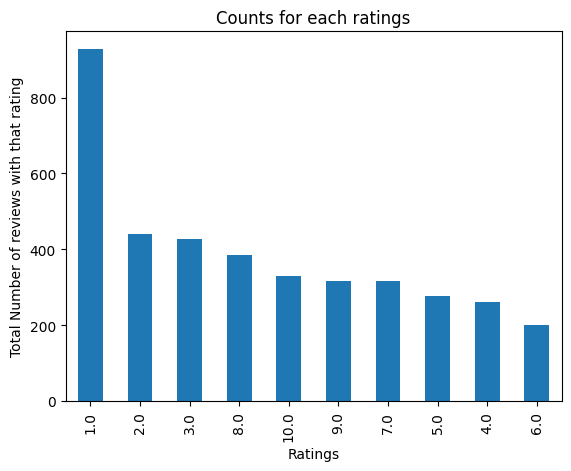

In [ ]:
#total counts for each rating
df['rating_score'].value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Counts for each ratings")
plt.savefig('/content/gdrive/My Drive/figs/ba_rating_counts.png')
plt.show()

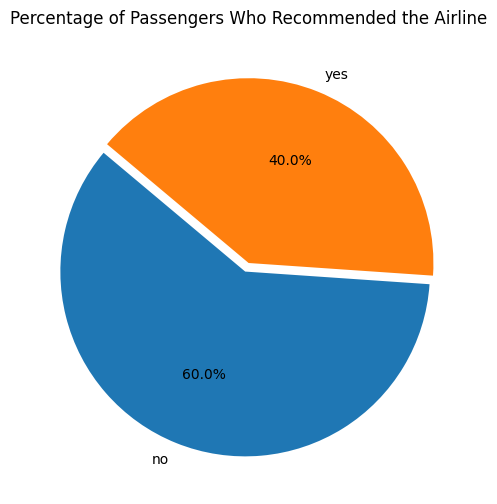

In [ ]:
recommendation_counts = df['recommended'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('tab10'), startangle=140, explode=(0.05, 0))
plt.title("Percentage of Passengers Who Recommended the Airline")
plt.savefig('/content/gdrive/My Drive/figs/ba_recommended.png')
plt.show()

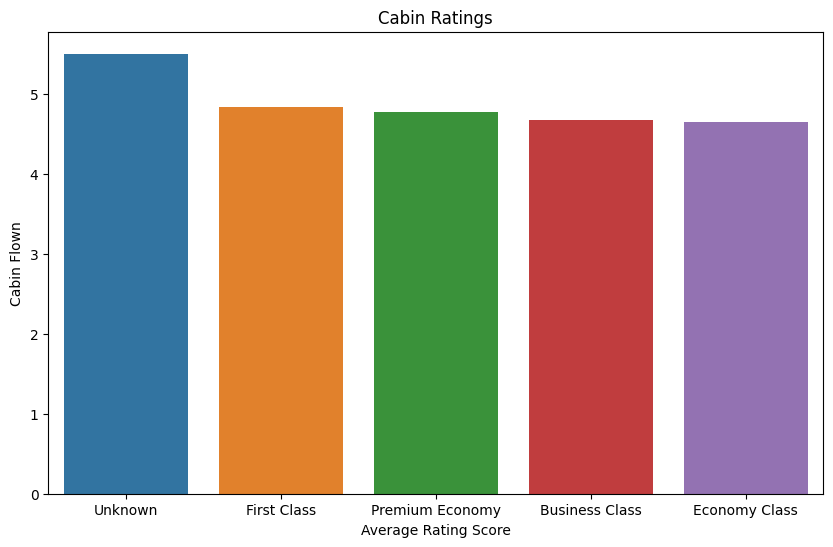

In [ ]:
#calculate the average rating score for each cabin
cabin_ratings = df.groupby('cabin_flown')['rating_score'].mean().reset_index()

#sort the values by rating score for a more organized plot (optional)
cabin_ratings = cabin_ratings.sort_values(by='rating_score', ascending=False)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cabin_ratings[:10], x='cabin_flown', y='rating_score', palette='tab10')
plt.title('Cabin Ratings')
plt.xlabel('Average Rating Score')
plt.ylabel('Cabin Flown')
plt.savefig('/content/gdrive/My Drive/figs/ba_cabin_ratings.png')
plt.show()

In [ ]:
print(f"{len(df.country.unique())} unique countries")

75 unique countries


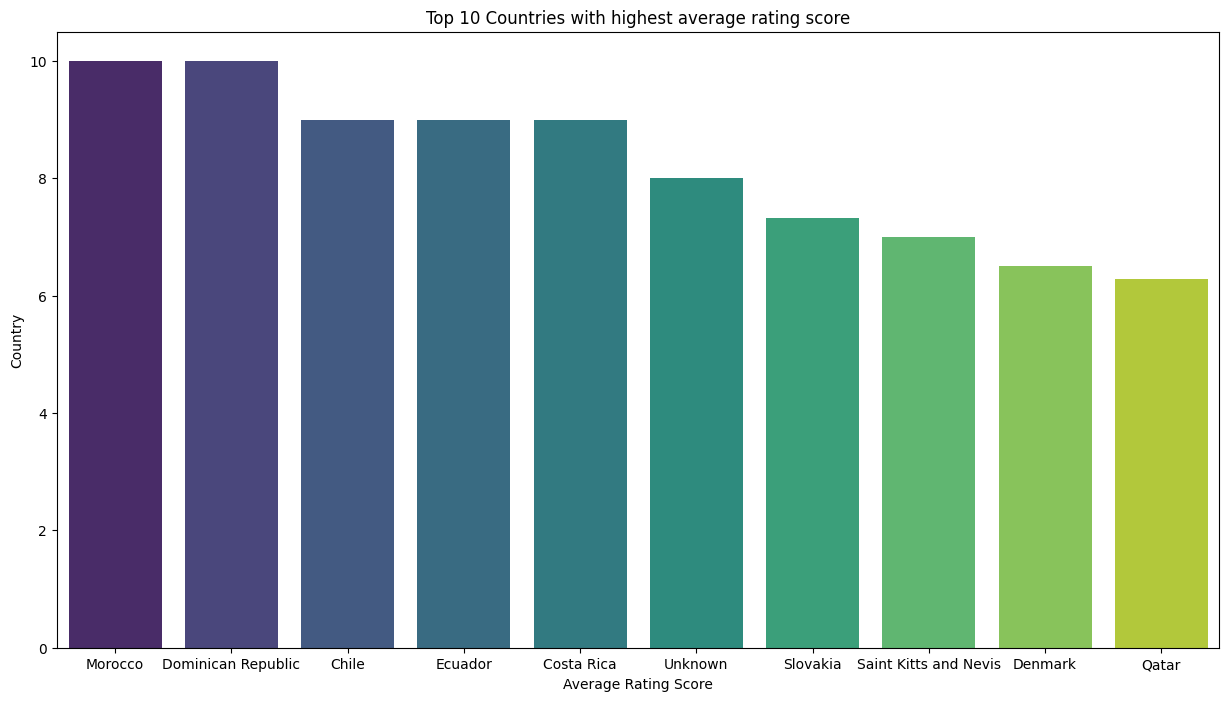

In [ ]:
#calculate the average rating score for each country
country_ratings = df.groupby('country')['rating_score'].mean().reset_index()

#sort the values by rating score for a more organized plot (optional)
country_ratings = country_ratings.sort_values(by='rating_score', ascending=False)

#plot
plt.figure(figsize=(15, 8))
sns.barplot(data=country_ratings[:10], x='country', y='rating_score', palette='viridis')
plt.title('Top 10 Countries with highest average rating score')
plt.xlabel('Average Rating Score')
plt.ylabel('Country')
plt.savefig('/content/gdrive/My Drive/figs/ba_country_ratings.png')
plt.show()

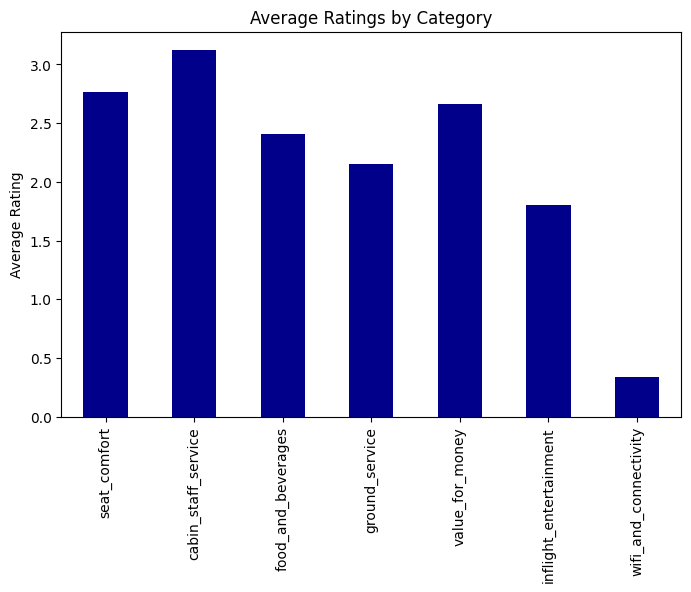

In [ ]:
#average rating by category
categories = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages',
              'ground_service', 'value_for_money', 'inflight_entertainment',
              'wifi_and_connectivity']
avg_ratings = df[categories].mean()

#bar plot
plt.figure(figsize=(8, 5))
avg_ratings.plot(kind='bar', color='darkblue', title=('Average Ratings by Category'))
plt.ylabel('Average Rating')
plt.savefig('/content/gdrive/My Drive/figs/ba_average_ratings.png')
plt.show()

In [ ]:
import re

#convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#clean the review text
df['cleaned_reviews'] = df['reviews'].apply(lambda x: re.sub(r'✅ Trip Verified | Not Verified | [^\w\s]', '', str(x)).strip())

#drop rows with essential columns missing
df.dropna(subset=['cleaned_reviews', 'rating_score', 'date'], inplace=True)


**WORD CLOUD**

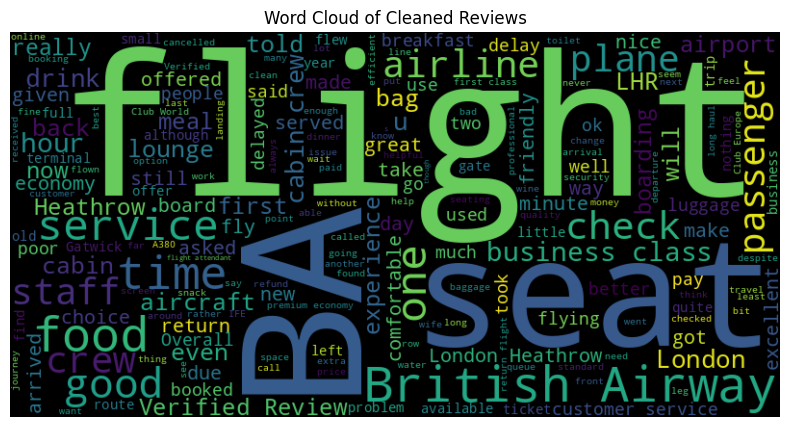

In [ ]:
from wordcloud import WordCloud

#combine all cleaned reviews into a single string
reviews = " ".join(review for review in df['cleaned_reviews'])

#create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(reviews)

#display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.savefig('/content/gdrive/My Drive/figs/ba_wordcloud.png')
plt.show()

**SENTIMENT ANALYSIS**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#download VADER lexicon
nltk.download('vader_lexicon')

#initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

#apply VADER sentiment analysis
df['sentiment_scores'] = df['cleaned_reviews'].apply(lambda review: sia.polarity_scores(review))

#extract compound score as a single sentiment value
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


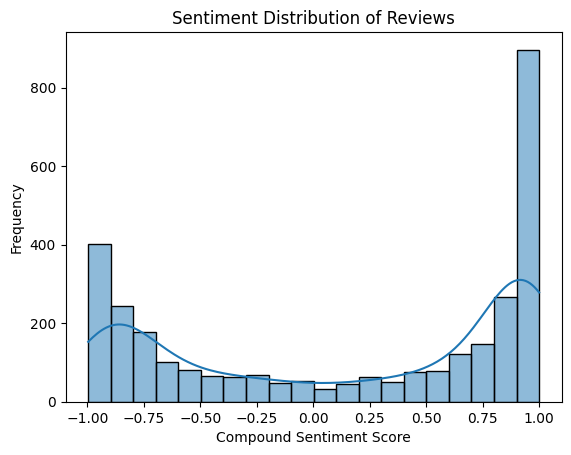

In [ ]:
#plot histogram for compound sentiment scores
sns.histplot(df['compound_sentiment'], kde=True, bins=20)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#categorize segments
def categorize_sentiment(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#apply categorization function
df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)

#count the occurrences of each category
sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
Positive    1763
Negative    1278
Neutral       39
Name: count, dtype: int64


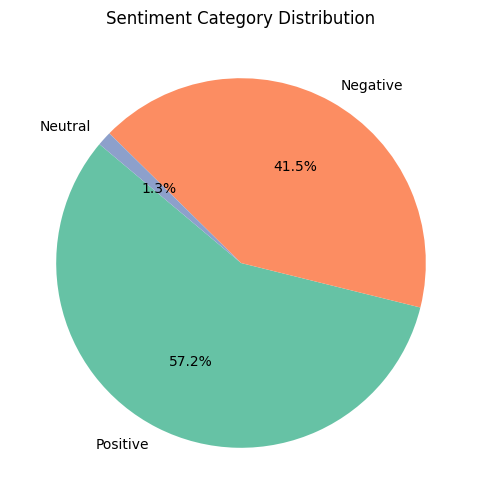

In [ ]:
#plot pie chart to visualize sentiment counts
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', n_colors=3))
plt.title('Sentiment Category Distribution')
plt.savefig('/content/gdrive/My Drive/figs/ba_sentiment.png')
plt.show()

57% of the reviews were positive

**TOPIC MODELLING**